# Environment Setup

*   **Anaconda**
    *   An opensource data science platform.
*   **Visual Studio Code** – including python and Jupyter extensions.
    *   The IDE for writing the code.
*   **Numpy**
    *   A python package for dealing with arrays and high-dimensional matrices with comprehensive mathematical functions.
*   **Scipy**
    *   A Python library used for scientific computing and technical computing.
*   **OpenCV**
    *   A real-time optimized Computer Vision library, tools, and hardware. It also supports model execution for Machine Learning. 
*   **Matplotlib**
    *   Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   **Other environments to use**
    *   Datalore by Jetbrains
    *   Colab by Google
*   **Other IDEs**
    *   Dataspell by Jetbrains
    *   Jupyter IDE
    *   Spyder IDE

To install any package, refer to its documentation by searching for the installation steps for Anaconda environment.

Most packages are installed via the command: `conda install <package-name>`


#### Optional

In the python shell, execute:

    `import sys`
    
    `sys.path.append('path to images')`

# Chapter 2: Handling Files, Cameras, and GUIs

## Reading/writing an image file

We can create a 3x3 square black image from scratch by simply creating a 2D NumPy array.

Here, each pixel is represented by a single 8-bit integer, which means that the values for
each pixel are in the 0-255 range, where 0 is black, 255 is white, and the in-between values
are shades of gray.

[[0 0 0]
 [0 0 0]
 [0 0 0]]


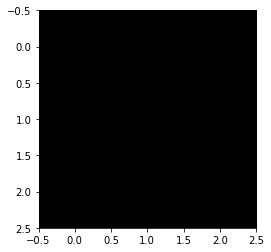

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((3, 3), dtype=np.uint8)

print(img)
plt.imshow(img, cmap='gray')

Let's now convert this image into blue-green-red (BGR) format using
the `cv2.cvtColor` function

In [2]:
import cv2

img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Images can be loaded from one file format and saved to another. For example, let's convert
an image from PNG into JPEG:

In [11]:
img = cv2.imread('./Images/1.png')
cv2.imwrite("newImg.jpg" ,img)


True

By default, `imread` returns an image in the BGR color format even if the file uses a
grayscale format.

(512, 512, 3)


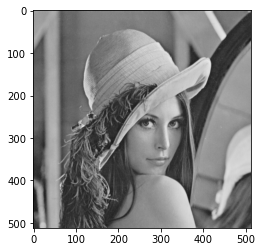

In [13]:
img = cv2.imread('./Images/lena_gray_512.tif') # BGR image
print(img.shape)

plt.imshow(img)

Optionally, we may specify the mode of `imread`. The supported options include the
following:

*   `cv2.IMREAD_COLOR`: This is the default option, providing a 3-channel BGR
image with an 8-bit value (0-255) for each channel.

*   `cv2.IMREAD_GRAYSCALE`: This provides an 8-bit grayscale image.

*   `cv2.IMREAD_ANYCOLOR`: This provides either an 8-bit-per-channel BGR image or
an 8-bit grayscale image, depending on the metadata in the file.

*   `cv2.IMREAD_UNCHANGED`: This reads all of the image data, including the alpha or
transparency channel (if there is one) as a fourth channel.


In [5]:
## Read a grayscale image in grayscale mode
img = cv2.imread('./Images/lena_gray_512.tif', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(512, 512)


In [15]:
%matplotlib inline

(512, 512)


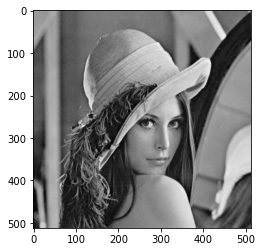

(512, 512, 3)


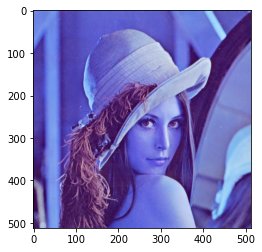

In [17]:
## Read the image in any color mode
img = cv2.imread('./Images/lena_gray_512.tif', cv2.IMREAD_ANYCOLOR)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.imread('./Images/lena.tif', cv2.IMREAD_ANYCOLOR)
print(img.shape)
plt.imshow(img)
plt.show()

To convert BGR to RGB use `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` function

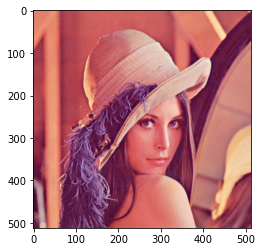

In [20]:
img = cv2.imread('./Images/lena.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Accessing image data with numpy.array

In [21]:
## Get pixel value at 50, 50
pixels = img[50, 50, :]
print(pixels)

[230 140 114]


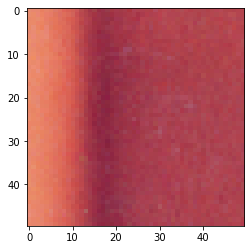

In [22]:
## get a slice of the image
pixels = img[50:100, 50:100, :]
plt.imshow(pixels)

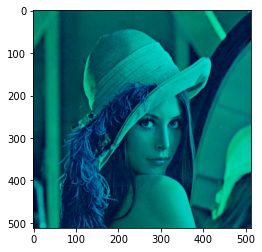

In [23]:
## change the value of the red channel to 0s

res = img.copy() # copy the image to a new variable
res[:, :, 0] = 0
plt.imshow(res)

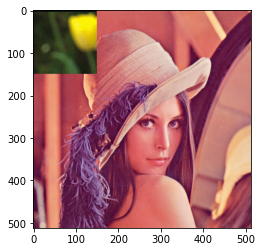

In [25]:
## Add patch of an image to another image

# Read an image to take a patch from it
img2 = cv2.imread('./Images/child.bmp')
# Convert its color space to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Take a patch of the image
slice = img2[0:150, 0:150, :]

img_cpy = img.copy()
# assign the patch to the image 
img_cpy[0:150, 0:150, :] = slice
plt.imshow(img_cpy)

## Reading/writing a video file

See Video_Capturing.py file.

We can read the video using `cv2.VideoCapture('MyInputVid.avi')`

We can get the frames per second using `get(cv2.CAP_PROP_FPS)` function

We can get the width and the height of the frames using `get(cv2.CAP_PROP_FRAME_WIDTH)` and `get(cv2.CAP_PROP_FRAME_HEIGHT)` 

**Validate the information using the file properties in file explorer**

In [26]:
# Read the video file
video = cv2.VideoCapture('./Images/video.mp4')

# get FPS
fps = video.get(cv2.CAP_PROP_FPS)
print(fps)

# get width and height of the frame
width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(width, height)

25.0
1280.0 720.0


To save a video file, use the function `cv2.VideoWriter(filename, codec, fps, size)`

The supported codecs are:

*   `0`: This option is an uncompressed raw video file. The file extension should be `.avi`.

*   `cv2.VideoWriter_fourcc('I','4','2','0')`: This option is an uncompressed YUV encoding, 4:2:0 chroma subsampled. This encoding is widely compatible but produces large files. The file extension should be `.avi`.

*   `cv2.VideoWriter_fourcc('P','I','M','1')`: This option is MPEG-1. The file extension should be `.avi`.

*   `cv2.VideoWriter_fourcc('X','V','I','D')`: This option is a relatively old MPEG-4 encoding. It is a good option if you want to limit the size of the resulting video. The file extension should be `.avi`.

*   `cv2.VideoWriter_fourcc('M','P','4','V')`: This option is another relatively old MPEG-4 encoding. It is a good option if you want to limit the size of the resulting video. The file extension should be `.mp4`.

*   `cv2.VideoWriter_fourcc('X','2','6','4')`: This option is a relatively new MPEG-4 encoding. It may be the best option if you want to limit the size of the resulting video. The file extension should be `.mp4`.

*   `cv2.VideoWriter_fourcc('T','H','E','O')`: This option is Ogg Vorbis. The file extension should be `.ogv`.

*   `cv2.VideoWriter_fourcc('F','L','V','1')`: This option is a Flash video. The file extension should be `.flv`.

In [30]:
## Convert the video we read above into XVID .avi format

new_video = cv2.VideoWriter('new video.avi', cv2.VideoWriter_fourcc('X', 'V', 'I', 'D'), int(fps), (int(width), int(height))) 

success, frame = video.read()
while success: # Loop until there are no more frames.
    new_video.write(frame)
    success, frame = video.read()

## Displaying an image in a window

In [31]:
img = cv2.imread('./Images/lady.png')
cv2.imshow('my image', img)

cv2.waitKey()
cv2.destroyAllWindows()